In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv("models/data/bookcrossing/ratings.csv", sep=',', engine='python', encoding='latin-1')
books = pd.read_csv('models/data/bookcrossing/books.csv', sep=',', engine='python', encoding='latin-1')

In [3]:
min_year = books[books['Year'] != 0]['Year'].min()

In [4]:
# Define the range of years
start_year = (min_year // 5) * 5
end_year = (books['Year'].max() // 5) * 5 + 5

# Create a list of 10-year periods
year_ranges = list(range(start_year, end_year, 5))

for start in year_ranges:
    end = start + 5
    column_name = f'{start}'
    books[column_name] = books['Year'].apply(lambda x: 1 if start <= x < end else 0)

books = books.loc[:, (books != 0).any(axis=0)]

books.head()

/var/folders/7c/y12245f559z49098cj1v6h8r0000gn/T/ipykernel_85635/498297194.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  books[column_name] = books['Year'].apply(lambda x: 1 if start <= x < end else 0)
/var/folders/7c/y12245f559z49098cj1v6h8r0000gn/T/ipykernel_85635/498297194.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  books[column_name] = books['Year'].apply(lambda x: 1 if start <= x < end else 0)
/var/folders/7c/y12245f559z49098cj1v6h8r0000gn/T/ipykernel_85635/498297194.py:11: PerformanceWarning: DataFrame is h

,ISBN,Title,Author,Year,Publisher,1375,1805,1895,1900,1905,...,1990,1995,2000,2005,2010,2020,2025,2030,2035,2050
0,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
year_range_counts = books.loc[:, '1375':'2050'].sum()
year_range_counts = year_range_counts/len(books)

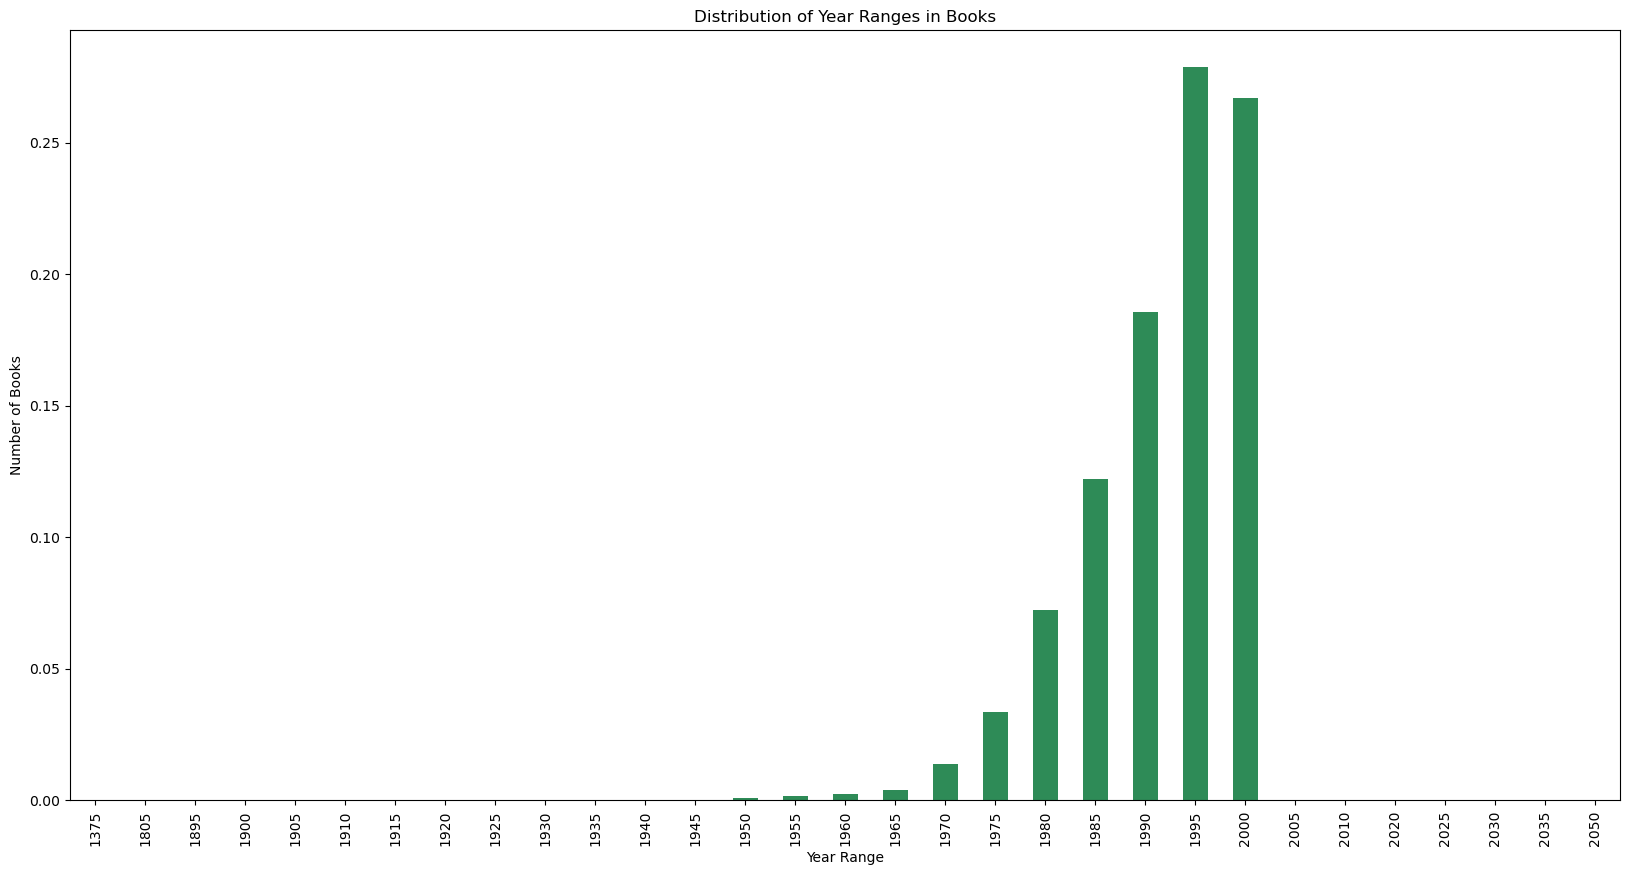

In [6]:
plt.figure(figsize=(20, 10))
year_range_counts.plot(kind='bar', color='seagreen')
plt.xlabel('Year Range')
plt.ylabel('Number of Books')
plt.title('Distribution of Year Ranges in Books')
plt.xticks(rotation=90)
plt.show()

In [7]:
books

,ISBN,Title,Author,Year,Publisher,1375,1805,1895,1900,1905,...,1990,1995,2000,2005,2010,2020,2025,2030,2035,2050
0,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271374,271373,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271375,271374,From One to One Hundred,Teri Sloat,1991,Dutton Books,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
271376,271375,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
271377,271376,Republic (World's Classics),Plato,1996,Oxford University Press,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
book_cols = list(books.columns)[5:]

/Users/call/anaconda3/envs/workshop/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


IndexError: index 18 is out of bounds for axis 0 with size 18

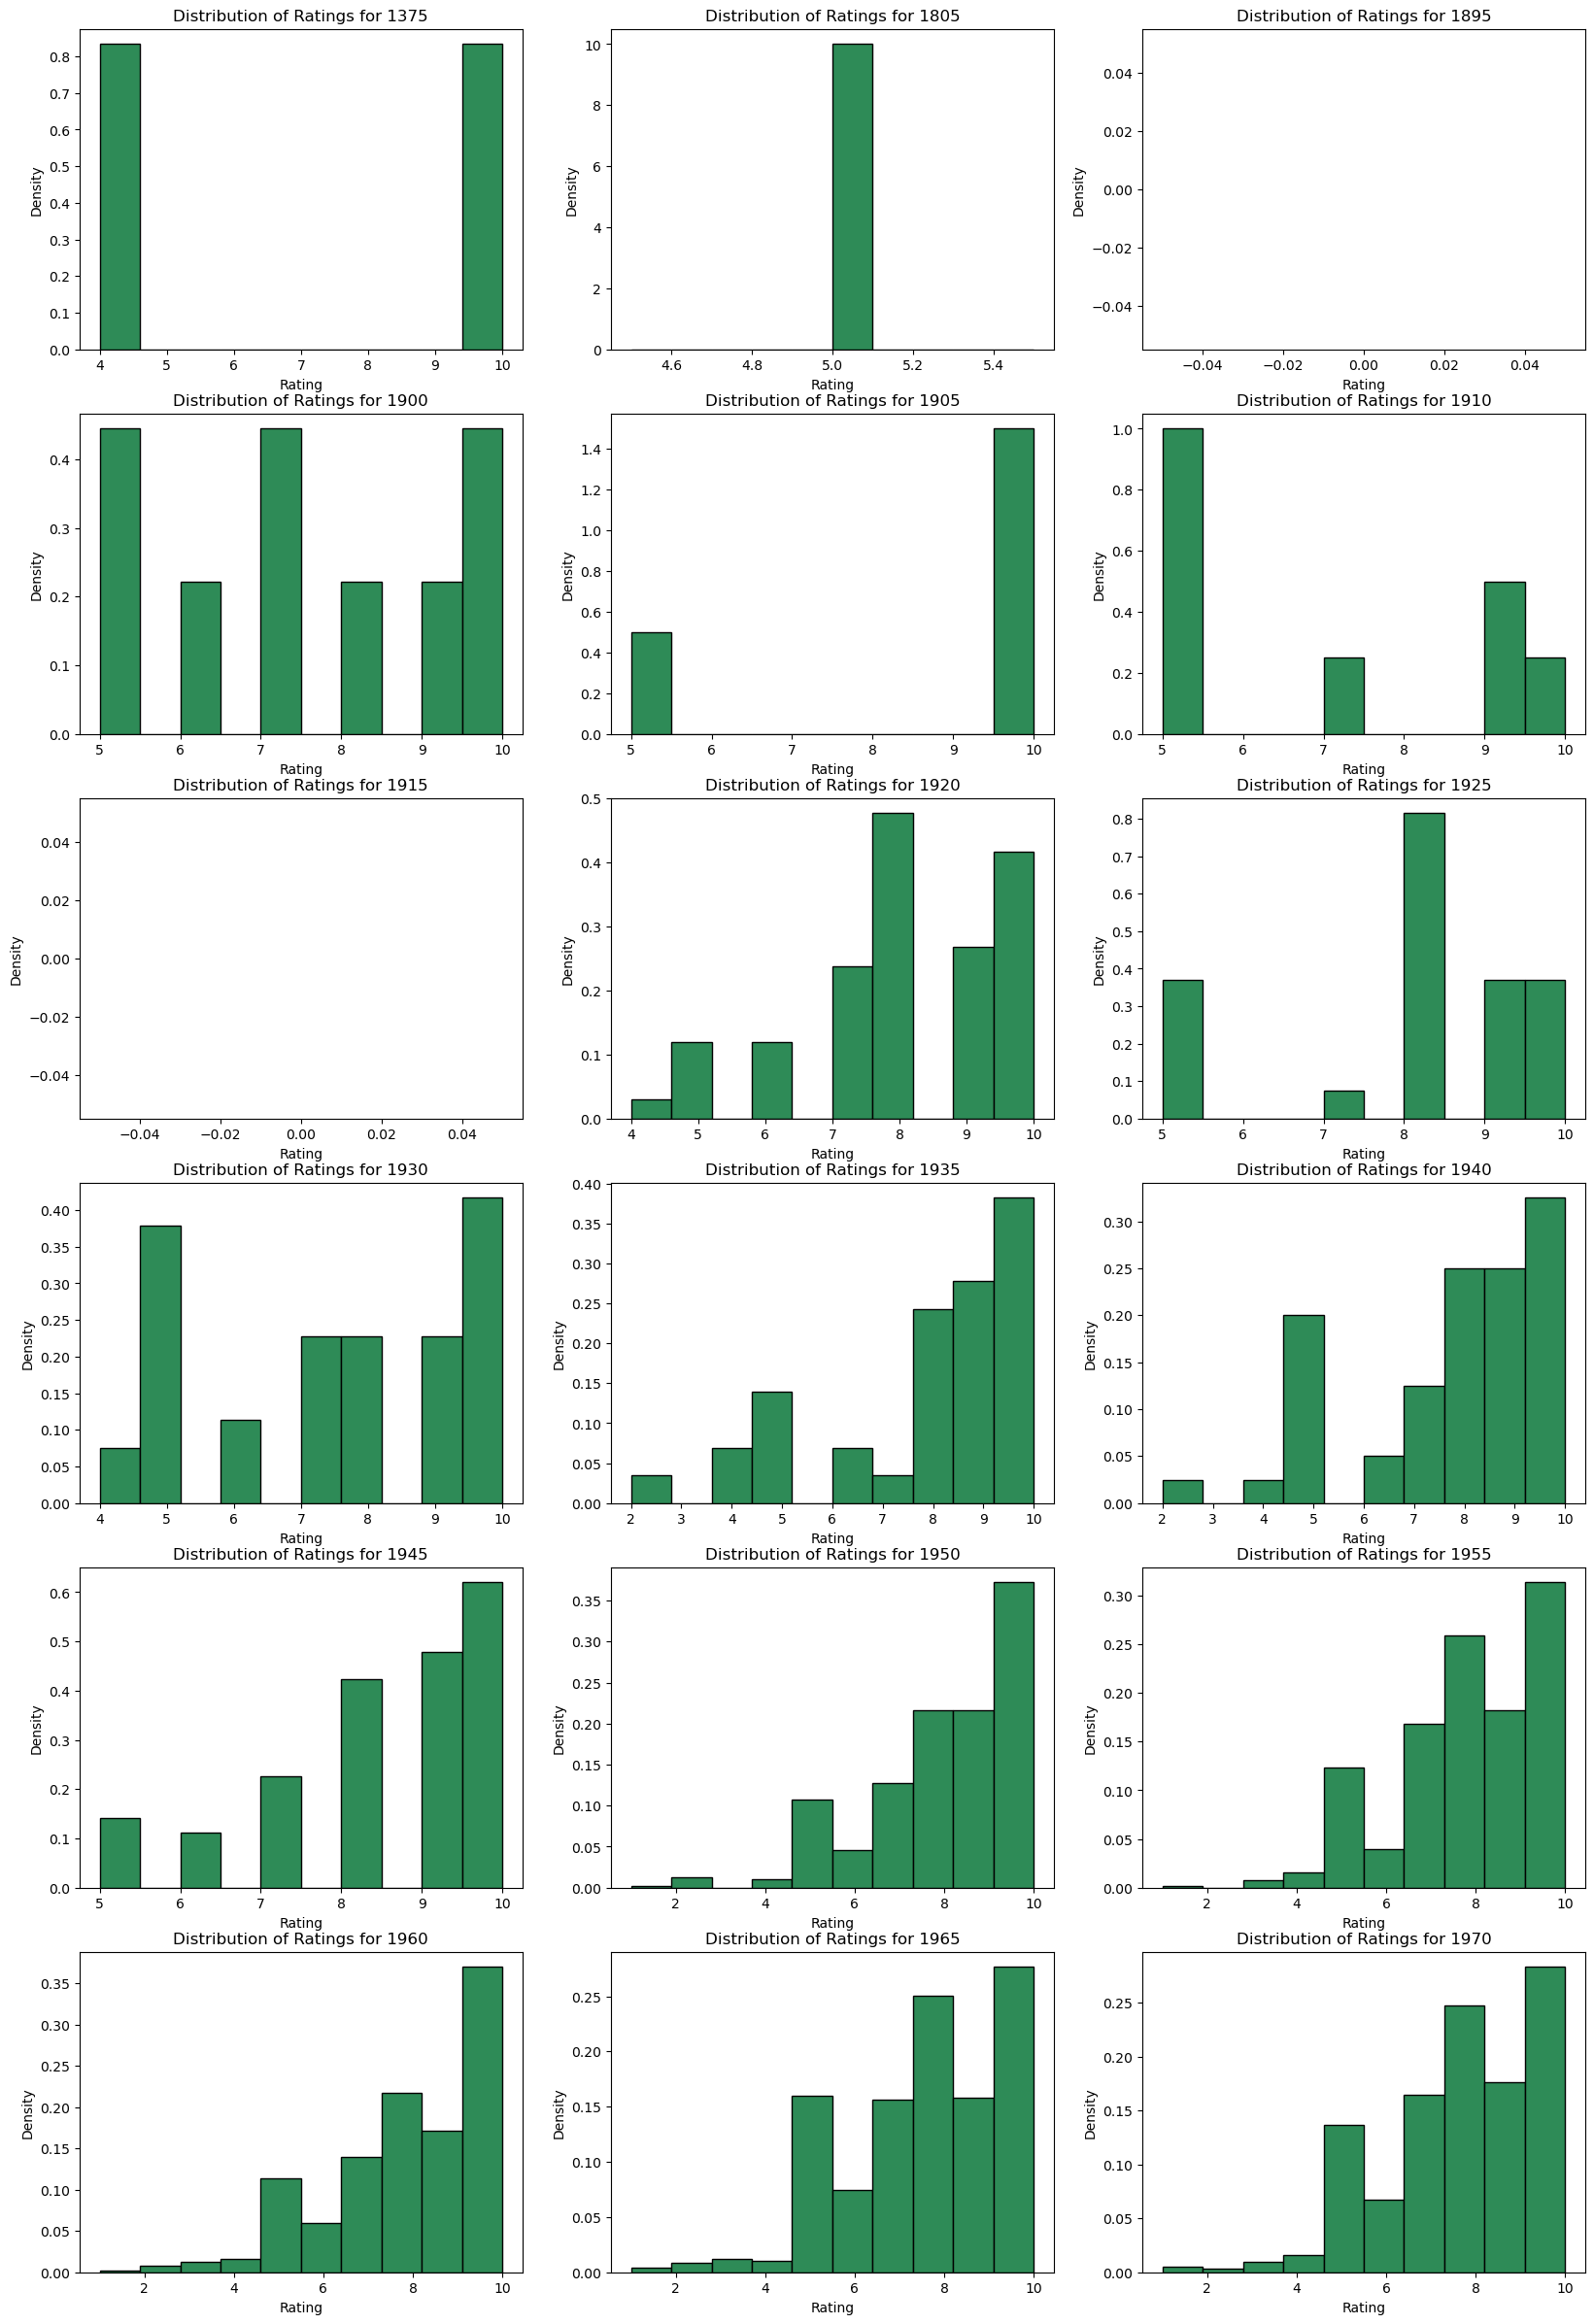

In [9]:
from scipy.stats import gamma, norm
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axes = axes.flatten()

merged_df = pd.merge(ratings, books, left_on='ISBN', right_on='ISBN')
merged_df = merged_df[merged_df['Rating'] != 0]


x = np.linspace(0, 10, 100)

for i, genre in enumerate(book_cols):
    genre_ratings = merged_df[merged_df[genre] == 1]['Rating']
    
    # Plot histogram of ratings
    axes[i].hist(genre_ratings, bins=10, edgecolor='black', color='seagreen', density=True)
    axes[i].set_title(f'Distribution of Ratings for {genre}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Density')
    
    # does not work, convergence outside bounds

    # Fit and plot gamma distribution
    #gamma_params = gamma.fit(genre_ratings)
    #gamma_pdf = gamma.pdf(x, *gamma_params)
    #axes[i].plot(x, gamma_pdf, color='red', label='Gamma Distribution')
    
    # Fit and plot normal distribution
    #mu, std = norm.fit(genre_ratings)
    #norm_pdf = norm.pdf(x, mu, std)
    #axes[i].plot(x, norm_pdf, color='blue', label='Normal Distribution')
    
    #axes[i].legend()

plt.tight_layout()
plt.show()

In [10]:
books

,ISBN,Title,Author,Year,Publisher,1375,1805,1895,1900,1905,...,1990,1995,2000,2005,2010,2020,2025,2030,2035,2050
0,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271374,271373,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271375,271374,From One to One Hundred,Teri Sloat,1991,Dutton Books,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
271376,271375,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
271377,271376,Republic (World's Classics),Plato,1996,Oxford University Press,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
prop_rep = {}
for col in books.columns:
    i = 0
    for row in books[col]:
        if row == 1:
            i += 1
    prop_rep[col] = i

del prop_rep['ISBN']
del prop_rep['Title']
del prop_rep['Author']
del prop_rep['Year']
del prop_rep['Publisher']

In [12]:
total_orig_genre = sum(prop_rep.values())

In [13]:
for key in prop_rep.keys():
    prop_rep[key] = prop_rep[key] / total_orig_genre

In [14]:
prop_rep

{'1375': 7.49737591842855e-06,
 '1805': 3.748687959214275e-06,
 '1895': 3.748687959214275e-06,
 '1900': 4.8732943469785574e-05,
 '1905': 1.49947518368571e-05,
 '1910': 7.872244714349978e-05,
 '1915': 7.49737591842855e-06,
 '1920': 0.00018743439796071375,
 '1925': 5.623031938821413e-05,
 '1930': 9.746588693957115e-05,
 '1935': 0.00011620932673564253,
 '1940': 0.0002699055330634278,
 '1945': 0.00020617783775678513,
 '1950': 0.0008359574149047833,
 '1955': 0.00149947518368571,
 '1960': 0.00250787224471435,
 '1965': 0.004138551506972559,
 '1970': 0.013945119208277103,
 '1975': 0.03394062078272605,
 '1980': 0.07361298545509072,
 '1985': 0.12424276503223872,
 '1990': 0.1887614334982756,
 '1995': 0.2836632178737442,
 '2000': 0.271483730694257,
 '2005': 0.00018743439796071375,
 '2010': 1.8743439796071373e-05,
 '2020': 1.8743439796071373e-05,
 '2025': 3.748687959214275e-06,
 '2030': 2.6240815714499924e-05,
 '2035': 7.49737591842855e-06,
 '2050': 7.49737591842855e-06}

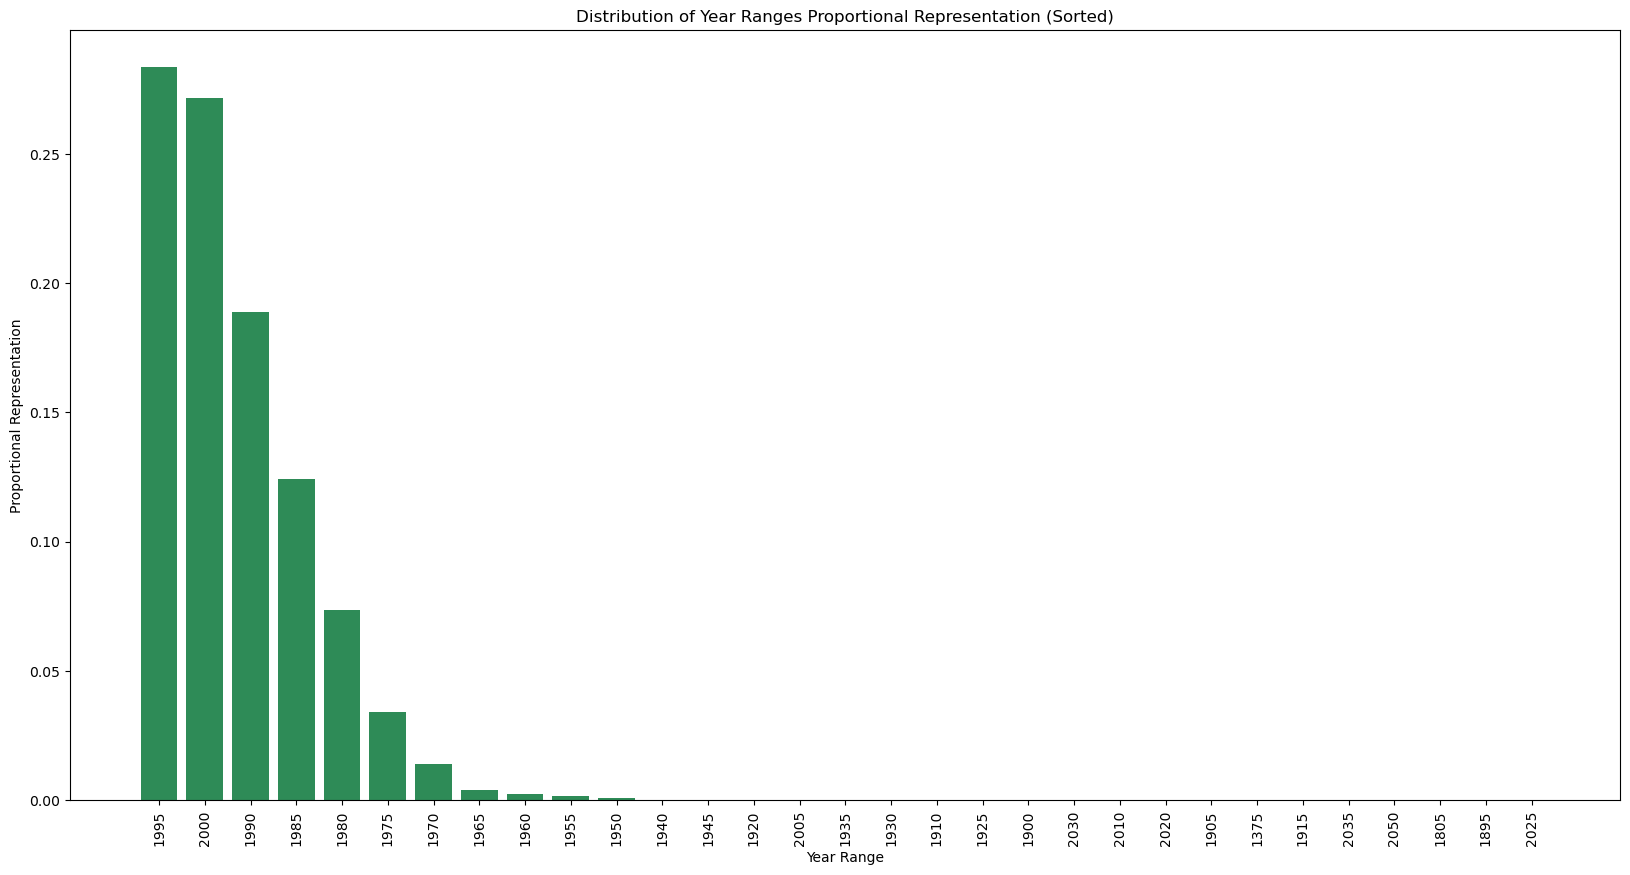

In [15]:
sorted_prop_rep = dict(sorted(prop_rep.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(20, 10))
plt.bar(sorted_prop_rep.keys(), sorted_prop_rep.values(), color='seagreen')
plt.xlabel('Year Range')
plt.ylabel('Proportional Representation')
plt.title('Distribution of Year Ranges Proportional Representation (Sorted)')
plt.xticks(rotation=90)

plt.show()

In [16]:
# manually switch between to generate plots
predictions10 = np.load("models/predictions/poisson_predictions_bc_10.npy")
predictions20 = np.load("models/predictions/poisson_predictions_bc_20.npy")
predictions50 = np.load("models/predictions/poisson_predictions_bc_50.npy")

In [17]:
top_50_book_features = []

for user_predictions in predictions10:
    top_50_indices = np.argsort(user_predictions)[-50:][::-1]
    top_50_book_ids = books[books['ISBN'].isin(top_50_indices)]
    top_50_features = []
    for col in top_50_book_ids.columns:
        for row in top_50_book_ids[col]:
            if row == 1:
                top_50_features.append(col)
    
    top_50_book_features.append(top_50_features)

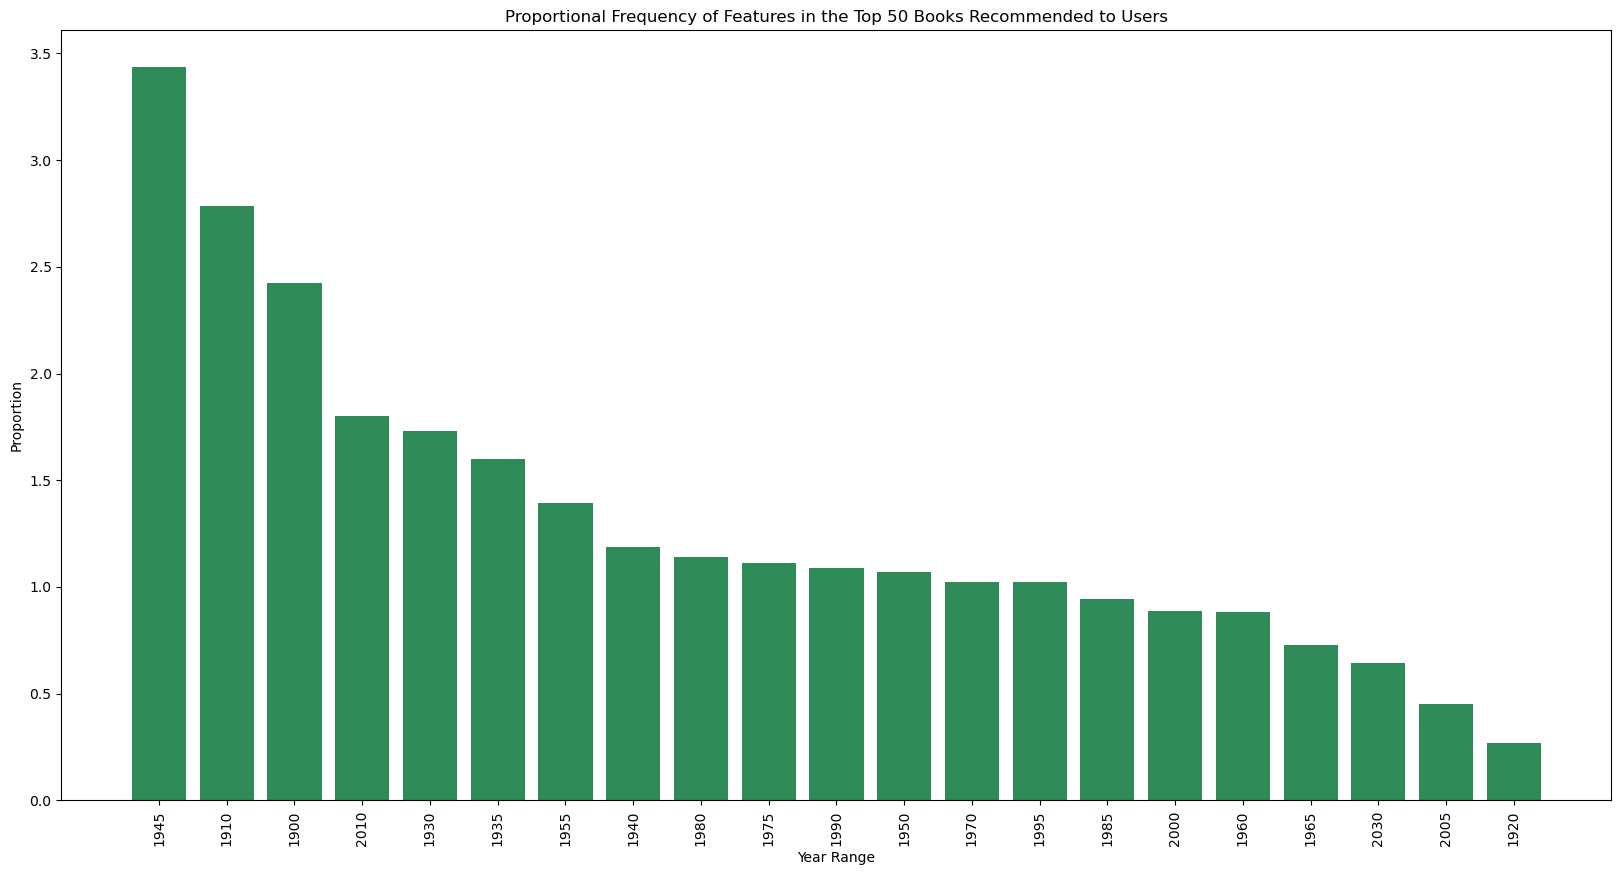

In [18]:
from collections import Counter

flat_list = [item for sublist in top_50_book_features for item in sublist]

feature_counts = Counter(flat_list)

del feature_counts['ISBN']

norm_total = sum(feature_counts.values())
for key in feature_counts.keys():
    feature_counts[key] = feature_counts[key] / norm_total

for key in feature_counts.keys():
    feature_counts[key] = feature_counts[key] / prop_rep[key]


# Convert the feature counts to a dataframe
feature_counts_df = pd.DataFrame.from_dict(feature_counts, orient='index').reset_index()
feature_counts_df.columns = ['Feature', 'Count']

# Sort the dataframe by the count
feature_counts_df = feature_counts_df.sort_values(by='Count', ascending=False)
feature_counts_df = feature_counts_df[feature_counts_df['Feature'] != '1805']

# Plot the histogram
plt.figure(figsize=(20, 10))
plt.bar(feature_counts_df['Feature'], feature_counts_df['Count'], color='seagreen')
plt.xticks(rotation=90)
plt.xlabel('Year Range')
plt.ylabel('Proportion')
plt.title('Proportional Frequency of Features in the Top 50 Books Recommended to Users')
plt.show()

In [31]:
feature_counts_df

,Feature,Count
11,1945,3.437175
13,1910,2.786372
15,1900,2.423649
19,2010,1.800425
9,1930,1.731178
16,1935,1.597151
8,1955,1.395330
14,1940,1.187781
1,1980,1.141712
0,1975,1.110600


In [19]:
tested_users10 = np.load("models/predictions/poisson_test_users_bc_10.npy")
tested_users20 = np.load("models/predictions/poisson_test_users_bc_20.npy")
tested_users50 = np.load("models/predictions/poisson_test_users_bc_50.npy")

In [20]:
# filter user_data by users in tested_users
filtered_user_data = ratings[ratings['User-ID'].isin(tested_users10)]

In [21]:
# make dictionary with movie IDs and counts
book_counts = filtered_user_data['ISBN'].value_counts().to_dict()

In [22]:
len(book_counts)

27564

In [23]:
from operator import itemgetter
res = dict(sorted(book_counts.items(), key=itemgetter(1), reverse=True)[:337])

In [24]:
popular_items = res.keys()

In [25]:
# for each user, count the number of popular books they have rated
popular_book_counts = {}
for user in tested_users10:
    user_data = filtered_user_data[filtered_user_data['User-ID'] == user]
    popular_book_count = user_data[user_data['ISBN'].isin(popular_items)].shape[0]
    popular_book_counts[user] = popular_book_count

In [26]:
#for each user, count the total number of books they have rated
total_book_counts = {}
for user in tested_users10:
    user_data = filtered_user_data[filtered_user_data['User-ID'] == user]
    total_book_count = user_data.shape[0]
    total_book_counts[user] = total_book_count

In [27]:
#make a dictionary with the proportion of popular/total for each user
prop_popular = {}
for user in tested_users10:
    prop_popular[user] = popular_book_counts[user] / total_book_counts[user]

In [28]:
prop_popular = {key: value for key, value in prop_popular.items() if value != 0}

In [29]:
max(prop_popular.values())

1.0

In [30]:
top_50_book_pop = []

for user_predictions in predictions10:
    # Get the indices of the top 50 highest rated predictions
    top_50_indices = np.argsort(user_predictions)[-50:][::-1]
    
    # Get the movie IDs for these indices
    top_50_movie_ids = books[books['ISBN'].isin(top_50_indices)]
    count_pop = 0
    for row in top_50_movie_ids["ISBN"]:
        if row in popular_items:
            count_pop += 1
    
    top_50_pop = count_pop / 50
    top_50_book_pop.append(top_50_pop)

KeyboardInterrupt: 

In [87]:
max(top_50_book_pop)

0.02

In [88]:
# what was this for?
#i = 0
#for user in prop_popular:
#    prop_popular[user] = top_50_movie_pop[i] / prop_popular[user]
#    i += 1

In [89]:
so = prop_popular.values()
soso = list(so)

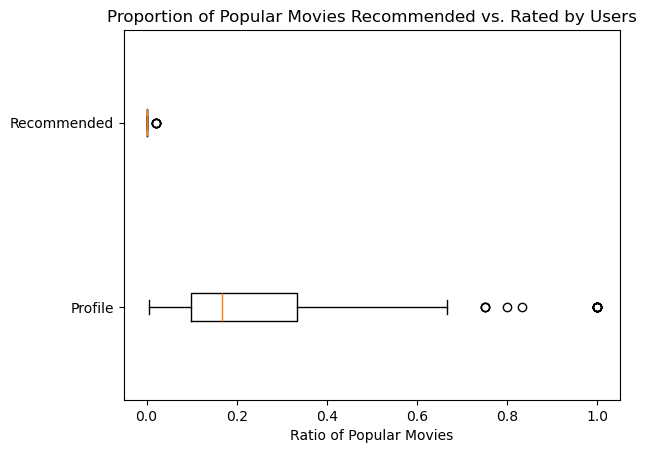

In [90]:
# scatterplot prop_popular
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot([soso, top_50_book_pop], labels=["Profile", "Recommended"], vert=False)
plt.xlabel('Ratio of Popular Movies')
plt.title('Proportion of Popular Movies Recommended vs. Rated by Users')
plt.show()